In [ ]:
# Competição Kaggle ML Olympiad - QUALITY EDUCATION
# ML Olympiad – Previsão das notas da prova do ENEM

# Participantes: Nathália Santiago | Dandara | Priscila Santos - Fevereiro 2022

#LINK: https://www.kaggle.com/c/qualityeducation/overview

In [ ]:
#install Kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nathsantiago","key":"5a50d415c63c4f57f4568e5e9a52e42f"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle

In [ ]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#to list all datasets in kaggle
! kaggle dataset list

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: argument command: invalid choice: 'dataset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'config')


In [ ]:
!kaggle competitions download -c qualityeducation

  0% 0.00/44.1k [00:00<?, ?B/s]
100% 44.1k/44.1k [00:00<00:00, 34.5MB/s]
 95% 252M/264M [00:02<00:00, 118MB/s]
100% 264M/264M [00:02<00:00, 95.9MB/s]
 90% 109M/121M [00:00<00:00, 129MB/s] 
100% 121M/121M [00:01<00:00, 117MB/s]
 90% 34.0M/37.9M [00:00<00:00, 56.9MB/s]
100% 37.9M/37.9M [00:00<00:00, 57.8MB/s]


In [ ]:
! unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
! unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [ ]:
! unzip sample_submission.csv.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [3]:
## ANÁLISE EXPLORATÓRIA DOS DADOS ##

In [4]:
#Importando Bibliotecas
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [5]:
#Importando os data frames train e test
df_train = pd.read_csv('/content/train.csv', sep="," , encoding="UTF8" )
df_test = pd.read_csv('/content/test.csv', sep="," , encoding="UTF8" )

In [6]:
#Data frame de saída
df_resposta = pd.DataFrame()

In [7]:
#Inserindo os dados de inscrições no data frame de resposta
df_resposta['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [8]:
df_train.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,...,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,d7e73c5f-2db8-4089-9bee-d3a0e045f87f,1100023,Ariquemes,11,RO,31.0,F,0,1,1,3200607.0,Aracruz,32.0,ES,1,10,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1100023,Ariquemes,11,RO,1,1,1,1,426.5,487.4,530.9,415.3,1.0,1.0,680.0,B,A,A,A,2.0,E,A,B,C,C,C,B,B,B,B,B,A,A,B,A,A,C,A,B,B
1,668bf6e4-ddf7-4810-b31e-7d325e36de4d,3106200,Belo Horizonte,31,MG,23.0,F,1,3,1,3106200.0,Belo Horizonte,31.0,MG,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3106200,Belo Horizonte,31,MG,1,1,1,1,463.0,452.3,456.6,407.2,0.0,1.0,520.0,B,C,D,B,2.0,E,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,B,B
2,951e80d6-ac9b-4ff2-8130-fcbc8ac78b16,3139409,Manhuaçu,31,MG,17.0,M,0,3,1,3106200.0,Belo Horizonte,31.0,MG,2,0,2,1.0,0,31075167.0,3139409.0,Manhuaçu,31.0,MG,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3139409,Manhuaçu,31,MG,1,1,1,1,381.7,474.4,530.6,622.8,0.0,1.0,600.0,E,B,C,D,3.0,F,A,B,C,B,A,B,A,B,A,B,A,B,C,B,B,D,A,B,B
3,baf409f9-ddc6-4e82-9a4b-b64b579cd105,2506301,Guarabira,25,PB,16.0,M,1,1,1,2506301.0,Guarabira,25.0,PB,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2506301,Guarabira,25,PB,1,1,1,1,426.7,343.9,444.2,507.0,1.0,1.0,660.0,C,E,B,B,4.0,B,A,B,D,A,A,B,B,A,A,B,A,A,B,A,A,E,A,A,B
4,9fd415ac-3421-44ce-810e-599545c3c025,2304400,Fortaleza,23,CE,19.0,M,1,1,1,2304400.0,Fortaleza,23.0,CE,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2304400,Fortaleza,23,CE,1,1,1,1,623.7,609.1,637.1,805.3,0.0,1.0,840.0,G,E,E,B,2.0,L,D,E,E,B,A,B,A,B,A,B,A,A,E,B,B,C,B,B,B


In [9]:
#Verificando colunas do data frame - ele é grande (vi o dicionário de dados antes) por isso separei os tipos
# as colunas referentes as notas já foram retiradas deste dataframe
df_test.select_dtypes(include='number')

,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_LINGUA,TP_STATUS_REDACAO,Q005
0,2305506,23,22.0,1,3,1,2305506.0,23.0,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2305506.0,23.0,0.0,0.0,0.0,0.0,1.0,NaN,4.0
1,3548500,35,19.0,1,1,1,3548500.0,35.0,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3548500.0,35.0,1.0,1.0,1.0,1.0,0.0,1.0,4.0
2,3552106,35,16.0,1,1,1,3552106.0,35.0,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3552106.0,35.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
3,3541000,35,22.0,1,1,1,3541000.0,35.0,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3541000.0,35.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0
4,4106902,41,17.0,1,1,1,4106902.0,41.0,2,0,3,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4106902.0,41.0,1.0,1.0,1.0,1.0,0.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569101,3534401,35,18.0,1,3,1,3534401.0,35.0,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3534401.0,35.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0
1569102,2704302,27,18.0,1,3,1,2704302.0,27.0,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2704302.0,27.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0
1569103,2404200,24,17.0,1,3,1,2408102.0,24.0,2,0,2,1.0,0,24083879.0,2408102.0,24.0,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2404200.0,24.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
1569104,4314902,43,17.0,1,1,1,4314902.0,43.0,2,0,2,1.0,0,43109187.0,4314902.0,43.0,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [10]:
#separar por tipos, pois o dataset possui muitas colunas - não tem coluna do tipo data
df_train.select_dtypes(include='number').head()

,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,...,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q005
0,1100023,11,31.0,0,1,1,3200607.0,32.0,1,10,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1100023,11,1,1,1,1,426.5,487.4,530.9,415.3,1.0,1.0,680.0,2.0
1,3106200,31,23.0,1,3,1,3106200.0,31.0,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3106200,31,1,1,1,1,463.0,452.3,456.6,407.2,0.0,1.0,520.0,2.0
2,3139409,31,17.0,0,3,1,3106200.0,31.0,2,0,2,1.0,0,31075167.0,3139409.0,31.0,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3139409,31,1,1,1,1,381.7,474.4,530.6,622.8,0.0,1.0,600.0,3.0
3,2506301,25,16.0,1,1,1,2506301.0,25.0,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2506301,25,1,1,1,1,426.7,343.9,444.2,507.0,1.0,1.0,660.0,4.0
4,2304400,23,19.0,1,1,1,2304400.0,23.0,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2304400,23,1,1,1,1,623.7,609.1,637.1,805.3,0.0,1.0,840.0,2.0


In [11]:
df_train.select_dtypes(include='object').head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_SEXO,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,d7e73c5f-2db8-4089-9bee-d3a0e045f87f,Ariquemes,RO,F,Aracruz,ES,NaN,NaN,Ariquemes,RO,B,A,A,A,E,A,B,C,C,C,B,B,B,B,B,A,A,B,A,A,C,A,B,B
1,668bf6e4-ddf7-4810-b31e-7d325e36de4d,Belo Horizonte,MG,F,Belo Horizonte,MG,NaN,NaN,Belo Horizonte,MG,B,C,D,B,E,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,B,B
2,951e80d6-ac9b-4ff2-8130-fcbc8ac78b16,Manhuaçu,MG,M,Belo Horizonte,MG,Manhuaçu,MG,Manhuaçu,MG,E,B,C,D,F,A,B,C,B,A,B,A,B,A,B,A,B,C,B,B,D,A,B,B
3,baf409f9-ddc6-4e82-9a4b-b64b579cd105,Guarabira,PB,M,Guarabira,PB,NaN,NaN,Guarabira,PB,C,E,B,B,B,A,B,D,A,A,B,B,A,A,B,A,A,B,A,A,E,A,A,B
4,9fd415ac-3421-44ce-810e-599545c3c025,Fortaleza,CE,M,Fortaleza,CE,NaN,NaN,Fortaleza,CE,G,E,E,B,L,D,E,E,B,A,B,A,B,A,B,A,A,E,B,B,C,B,B,B


In [12]:
df_train.corr()

,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,...,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q005
CO_MUNICIPIO_RESIDENCIA,1.000000,0.999862,-0.051889,-0.002538,-0.232333,0.002424,0.897500,0.897348,0.056293,-0.063710,0.058261,-0.002605,0.026972,0.997727,0.997981,0.997837,0.082998,-0.035466,-0.006386,-0.003504,-0.000513,-0.001398,0.001100,0.000233,0.000034,-0.000038,0.011818,0.004066,0.002339,0.001067,-0.001492,0.004799,-0.004195,-0.002649,-0.000434,0.001319,-0.001150,-0.000353,0.000636,-0.003485,...,0.009554,-0.000064,0.000192,-0.002532,-0.003700,0.000940,0.000921,0.000782,0.000946,0.000237,NaN,-0.000283,0.001613,0.000043,0.005498,0.001159,0.001447,0.000712,NaN,0.002083,0.002219,0.001063,0.000535,0.001447,0.001356,0.001367,0.994611,0.994466,-0.014153,-0.008397,-0.008397,-0.014153,0.135985,0.136193,0.157342,0.138938,-0.116178,-0.031716,0.053118,-0.136414
CO_UF_RESIDENCIA,0.999862,1.000000,-0.051201,-0.002393,-0.231079,0.002357,0.896993,0.897066,0.056101,-0.063290,0.057830,-0.002565,0.026966,0.997802,0.997838,0.997977,0.082164,-0.034825,-0.006263,-0.003494,-0.000512,-0.001373,0.001088,0.000203,0.000037,0.000005,0.011775,0.004030,0.002326,0.001084,-0.001467,0.004801,-0.004187,-0.002587,-0.000438,0.001291,-0.001112,-0.000376,0.000633,-0.003476,...,0.009545,-0.000058,0.000187,-0.002511,-0.003694,0.000913,0.000913,0.000803,0.000928,0.000241,NaN,-0.000282,0.001633,0.000025,0.005508,0.001132,0.001436,0.000719,NaN,0.002096,0.002217,0.001078,0.000550,0.001462,0.001328,0.001346,0.994484,0.994592,-0.014127,-0.008372,-0.008372,-0.014127,0.134765,0.135010,0.155972,0.137586,-0.114135,-0.031396,0.052521,-0.135898
NU_IDADE,-0.051889,-0.051201,1.000000,0.380968,0.054724,-0.021468,-0.069595,-0.068914,-0.455178,0.778575,-0.313094,0.052312,-0.276685,-0.074280,-0.074894,-0.073921,-0.082402,0.012204,0.003210,0.027273,0.010022,0.006469,0.007301,0.002417,0.034018,0.002418,-0.007711,-0.005016,-0.002755,-0.004002,0.015625,0.007805,0.002533,0.009769,0.037810,-0.001069,0.009917,0.003771,0.011978,0.027823,...,0.003843,0.005019,0.009054,0.006279,0.019527,0.002432,-0.000210,0.002381,0.003050,0.005943,NaN,0.004547,-0.000843,-0.000568,-0.003700,0.002491,0.001730,0.001544,NaN,0.002052,0.001070,-0.000421,0.000050,0.001435,0.002005,-0.000685,-0.051711,-0.051013,-0.201211,-0.208666,-0.208666,-0.201211,-0.056274,-0.031586,-0.084628,-0.139130,0.145231,0.056001,-0.166217,-0.134864
TP_ESTADO_CIVIL,-0.002538,-0.002393,0.380968,1.000000,0.026406,-0.010130,-0.009375,-0.009234,-0.136455,0.288360,-0.103635,0.020759,-0.076607,0.006762,0.006779,0.006738,-0.019345,0.001772,0.000989,0.009031,0.002045,0.000593,0.003059,-0.001046,0.010124,-0.002341,-0.005148,-0.001448,-0.000671,-0.002398,0.004722,0.000844,0.002867,0.003946,0.014787,-0.000320,0.003853,0.001388,0.001844,0.009043,...,-0.002189,0.000401,0.001026,

In [13]:
#criando a variável features com as notas que deverão ser preditas, essas colunas estão na base df_train
features_corr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO']

In [14]:
#verificando a soma dos valores nulos nas features
df_train[features_corr].isnull().sum()

NU_NOTA_MT         392315
NU_NOTA_CN         392314
NU_NOTA_CH         332000
NU_NOTA_LC         332000
NU_NOTA_REDACAO    332000
dtype: int64

In [15]:
#Verificando a soma dos valores não-nulos nas features - eu quis ver a proporção entre um e outra
df_train[features_corr].notnull().sum()

NU_NOTA_MT         1051573
NU_NOTA_CN         1051574
NU_NOTA_CH         1111888
NU_NOTA_LC         1111888
NU_NOTA_REDACAO    1111888
dtype: int64

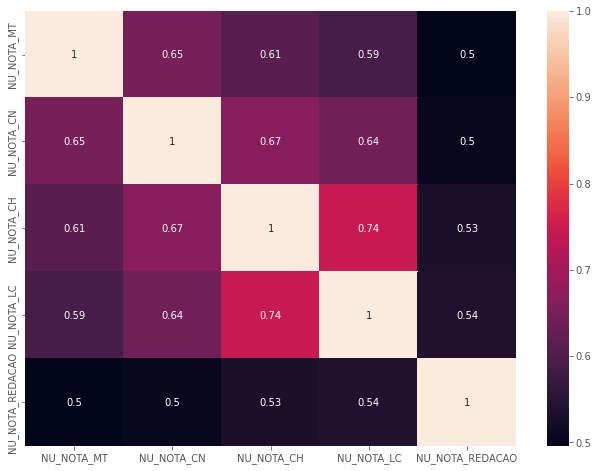

In [16]:
#ver correlações das features por heatmap
corr = df_train[features_corr].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

In [17]:
#POSSIBILIDADES: 
#1 Retirar registros com notas nulas,
#2 Preencher com as médias de notas próximas para não retirar muitas linhas do dataset
#3 Deixar as notas com o valor zero

In [18]:
#Possibilidade 3 - essa que escolhi, pois quem não fez a prova vai ter essa nota contabilizada
# Preenchemos as notas nulas com o valor '0' para todas as matérias
df_train['NU_NOTA_MT'].fillna(0.0, inplace=True)
df_train['NU_NOTA_CN'].fillna(0.0, inplace=True)
df_train['NU_NOTA_CH'].fillna(0.0, inplace=True)
df_train['NU_NOTA_LC'].fillna(0.0, inplace=True)
df_train['NU_NOTA_REDACAO'].fillna(0.0, inplace=True)

In [19]:
df_train[features_corr].isnull().sum()

NU_NOTA_MT         0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

count    1.443888e+06
mean     3.809269e+02
std      2.505968e+02
min      0.000000e+00
25%      0.000000e+00
50%      4.500000e+02
75%      5.572000e+02
99%      7.964000e+02
max      9.855000e+02
Name: NU_NOTA_MT, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


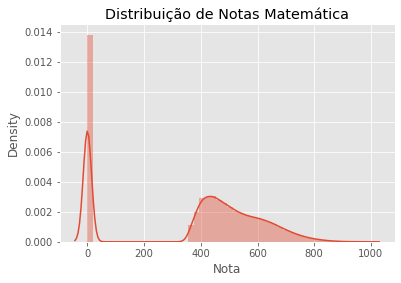

In [20]:
# Verificar a distribuição das notas
#MATEMÁTICA
notaMAT = 'NU_NOTA_MT'
print(df_train[notaMAT].describe(percentiles=[.25, .5, .75, .99]))
f, ax = plt.subplots()
ax.set(title="Distribuição de Notas Matemática")
sns.distplot(df_train[notaMAT], axlabel="Nota")
f.savefig("summary_plot1.png", bbox_inches='tight', dpi=600)

count    1.443888e+06
mean     3.478990e+02
std      2.221861e+02
min      0.000000e+00
25%      0.000000e+00
50%      4.307000e+02
75%      5.080000e+02
99%      6.509000e+02
max      8.609000e+02
Name: NU_NOTA_CN, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


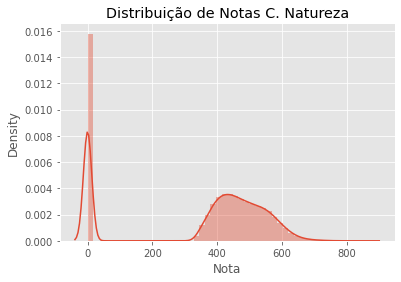

In [21]:
#CIÊNCIAS DA NATUREZA
notaCN = 'NU_NOTA_CN'
print(df_train[notaCN].describe(percentiles=[.25, .5, .75, .99]))
f, ax = plt.subplots()
ax.set(title="Distribuição de Notas C. Natureza")
sns.distplot(df_train[notaCN], axlabel="Nota")
f.savefig("summary_plot1.png", bbox_inches='tight', dpi=600)

count    1.443888e+06
mean     3.905579e+02
std      2.253391e+02
min      0.000000e+00
25%      3.568000e+02
50%      4.744000e+02
75%      5.496000e+02
99%      6.762000e+02
max      8.227000e+02
Name: NU_NOTA_CH, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


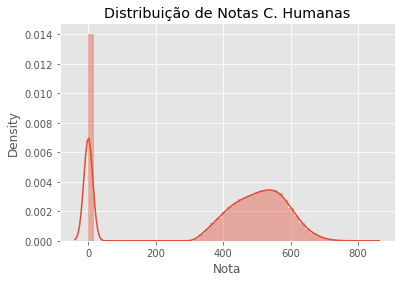

In [22]:
#CIÊNCIAS HUMANAS
notaCH = 'NU_NOTA_CH'
print(df_train[notaCH].describe(percentiles=[.25, .5, .75, .99]))
f, ax = plt.subplots()
ax.set(title="Distribuição de Notas C. Humanas")
sns.distplot(df_train[notaCH], axlabel="Nota")
f.savefig("summary_plot1.png", bbox_inches='tight', dpi=600)

count    1.443888e+06
mean     4.007701e+02
std      2.261271e+02
min      0.000000e+00
25%      3.810000e+02
50%      5.026000e+02
75%      5.529000e+02
99%      6.404000e+02
max      8.017000e+02
Name: NU_NOTA_LC, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


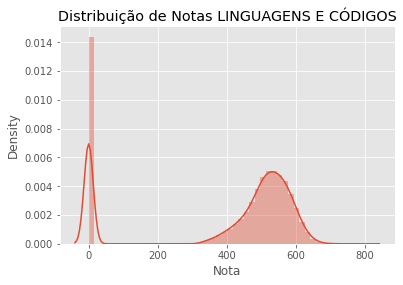

In [23]:
#LINGUAGENS E CÓDIGOS
notaLC = 'NU_NOTA_LC'
print(df_train[notaLC].describe(percentiles=[.25, .5, .75, .99]))
f, ax = plt.subplots()
ax.set(title="Distribuição de Notas LINGUAGENS E CÓDIGOS")
sns.distplot(df_train[notaLC], axlabel="Nota")
f.savefig("summary_plot1.png", bbox_inches='tight', dpi=600)

count    1.443888e+06
mean     4.397862e+02
std      2.917280e+02
min      0.000000e+00
25%      0.000000e+00
50%      5.400000e+02
75%      6.400000e+02
99%      9.400000e+02
max      1.000000e+03
Name: NU_NOTA_REDACAO, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


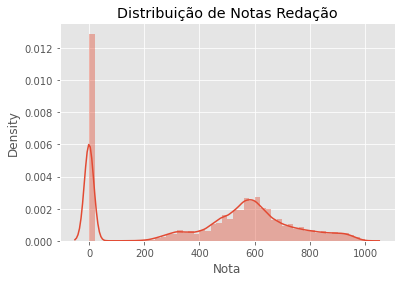

In [24]:
#REDAÇÃO
notaRED = 'NU_NOTA_REDACAO'
print(df_train[notaRED].describe(percentiles=[.25, .5, .75, .99]))
f, ax = plt.subplots()
ax.set(title="Distribuição de Notas Redação")
sns.distplot(df_train[notaRED], axlabel="Nota")
f.savefig("summary_plot1.png", bbox_inches='tight', dpi=600)

In [25]:
#Depois dessa análise, pode ser mais interessante excluir os dados com nota zerada OU voltar um passo atrás e preencher com as médias.

In [26]:
#dados dos estado e agrupando por regiões para facilitar a visualização
regioes = {
    'RR':'Norte', 'AP':'Norte', 'AM':'Norte', 'PA':'Norte', 'AC':'Norte', 'RO':'Norte', 'TO':'Norte', 'MA':'Nordeste',
    'PI':'Nordeste', 'CE':'Nordeste', 'RN':'Nordeste', 'PB':'Nordeste', 'PE':'Nordeste', 'AL':'Nordeste', 'SE':'Nordeste',
    'BA':'Nordeste', 'MT':'Centro-oeste', 'DF':'Centro-oeste', 'GO':'Centro-oeste', 'MS':'Centro-oeste', 'MG':'Sudeste',
    'ES':'Sudeste', 'RJ':'Sudeste', 'SP':'Sudeste', 'PR':'Sul', 'SC':'Sul', 'RS':'Sul', 
}

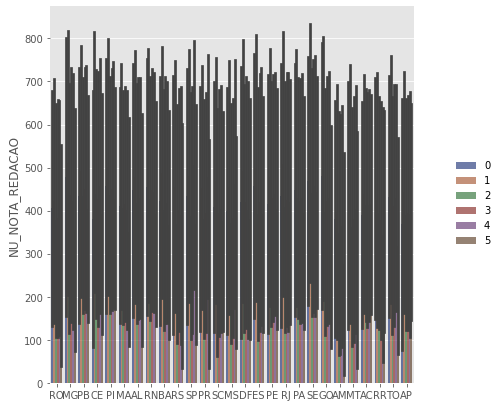

In [27]:
# Draw a nested barplot by species and sex
import seaborn as sns
g = sns.catplot(
    data=df_train, kind="bar",
    x="SG_UF_RESIDENCIA", y="NU_NOTA_REDACAO", hue="TP_COR_RACA",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "NU_NOTA_REDACAO")
g.legend.set_title("")
 

In [ ]:
#Possibilidade 1
#Usando o loc com uma condição composta para obter somente registros com todas as provas pontuadas - df_train
#Por que fazer isso? Sabemos que há alunos que vão ao primeiro dia de prova e não no segundo ou vice-versa.
#df_train = df_train.loc[
#    (df_train['NU_NOTA_CN'].notnull()) &
#    (df_train['NU_NOTA_CH'].notnull()) &
#    (df_train['NU_NOTA_LC'].notnull()) &
#    (df_train['NU_NOTA_REDACAO'].notnull()) &
#    (df_train['NU_NOTA_MT'].notnull())
#]

In [ ]:
#Possibilidade 2
#Preencher valores nulos com o valor médio - Tratamento das notas de provas corrompidas
#df_train['NU_NOTA_MT'].fillna(df_train['NU_NOTA_CN'].mean(), inplace=True)
#df_train['NU_NOTA_CN'].fillna(df_train['NU_NOTA_CN'].mean(), inplace=True)
#df_train['NU_NOTA_CH'].fillna(df_train['NU_NOTA_CH'].mean(), inplace=True)
#df_train['NU_NOTA_REDACAO'].fillna(df_train['NU_NOTA_REDACAO'].mean(), inplace=True)
#df_train['NU_NOTA_LC'].fillna(df_train['NU_NOTA_LC'].mean(), inplace=True)